In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
brc =load_breast_cancer()

In [ ]:
type(brc)

sklearn.utils._bunch.Bunch

In [ ]:
df = pd.DataFrame.from_dict(data=brc.data)

In [ ]:
df.columns = brc.feature_names
df['target'] = brc.target

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
brc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
brc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
print (brc.target_names)

['malignant' 'benign']


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


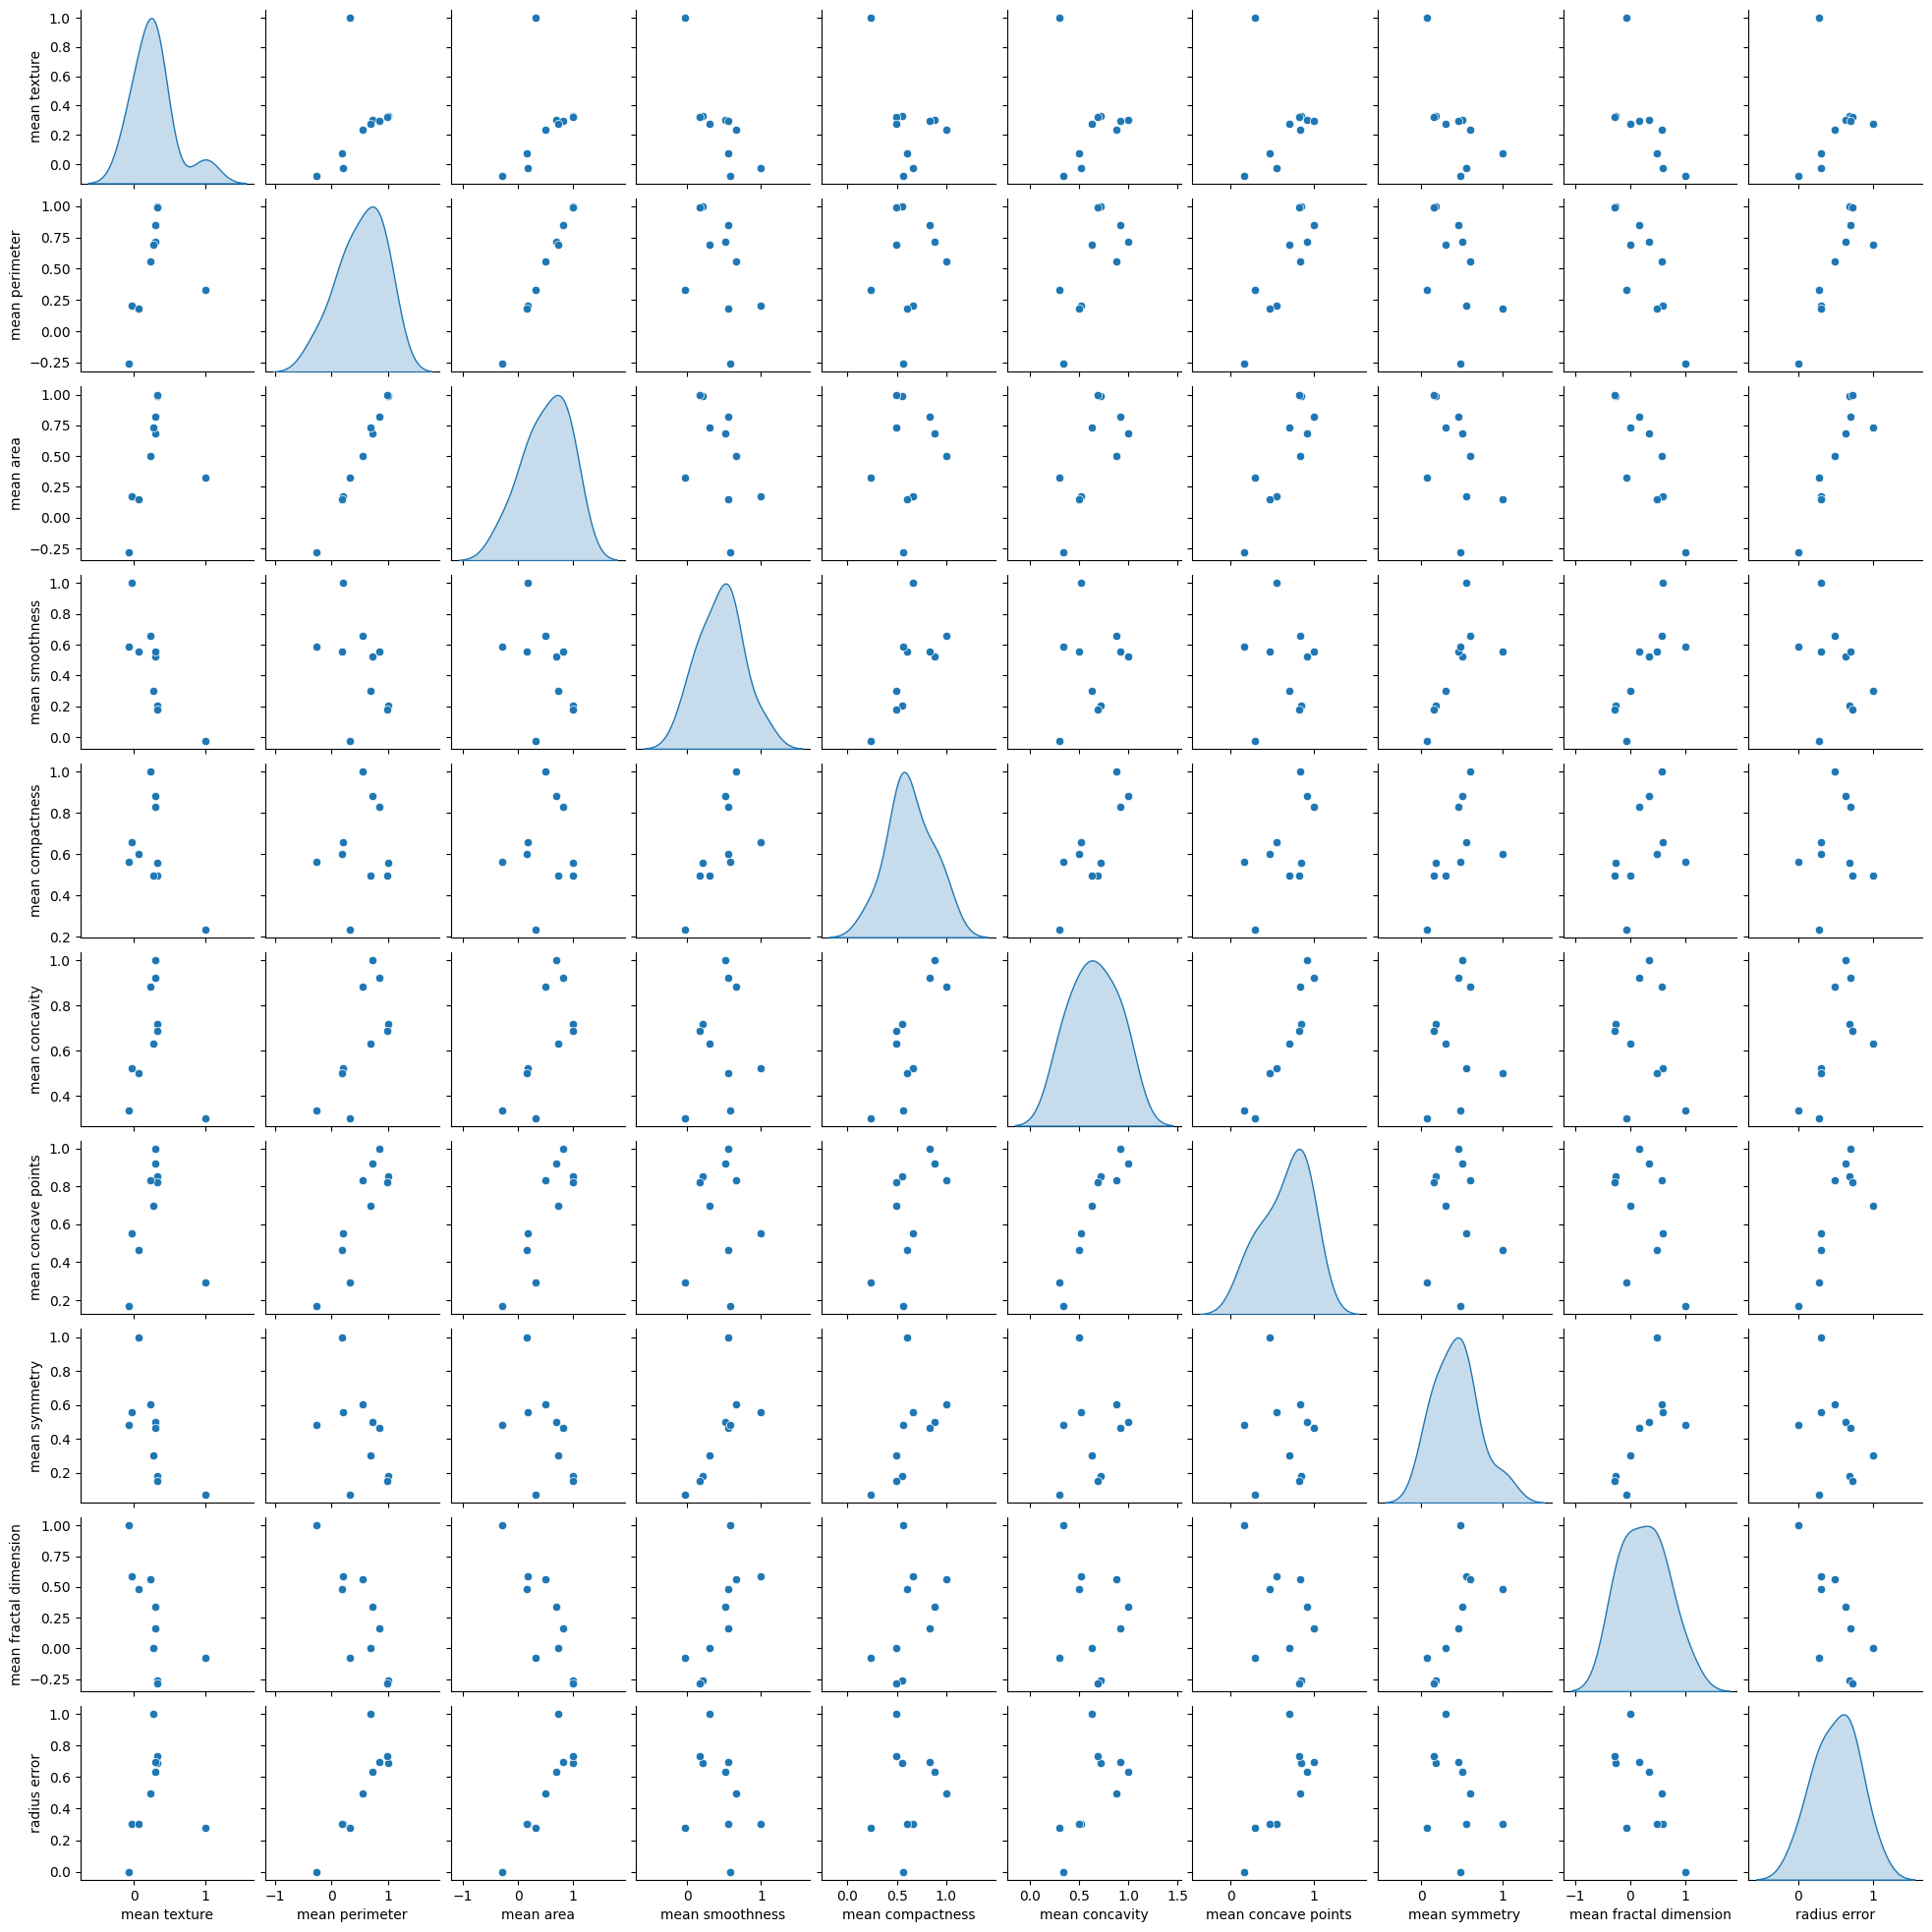

In [ ]:
featureMeans = list(df.columns[1:11])
correlationData = df[featureMeans].corr()
sns.pairplot(df[featureMeans].corr(), diag_kind='kde', size=2);

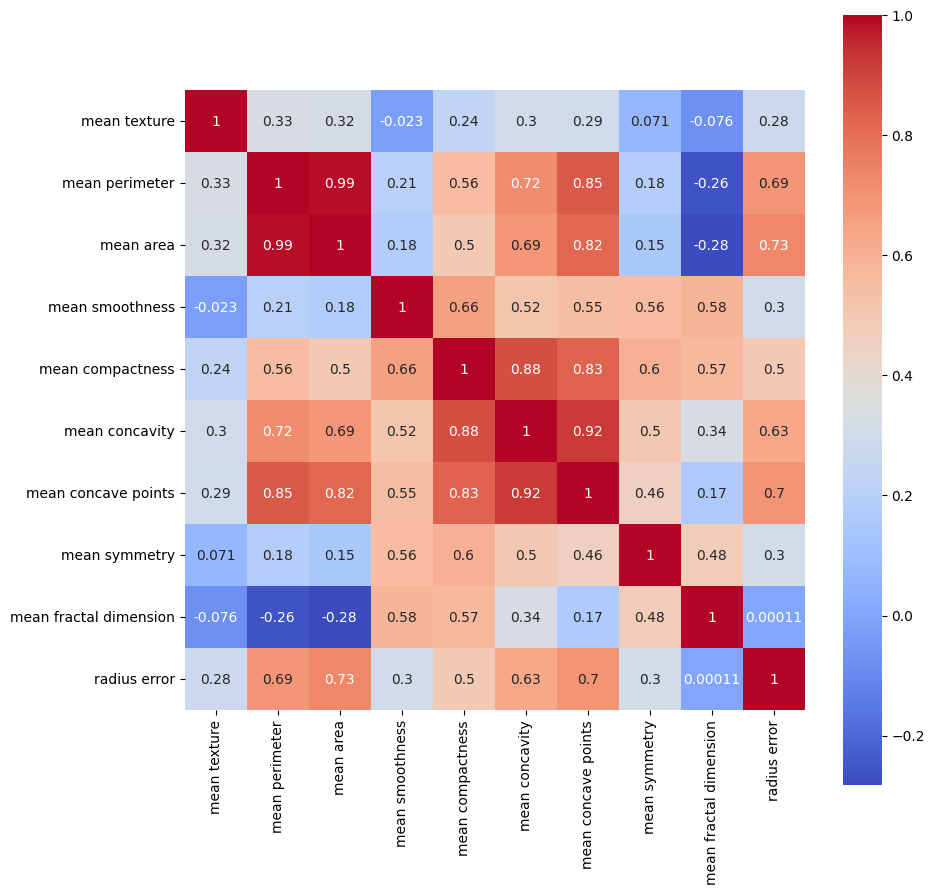

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(brc.data, brc.target, test_size=0.2, random_state=42)

In [ ]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(9, activation = 'relu',input_dim = x_train.shape[1]))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs = 50, validation_split= 0.2, shuffle= True)

Epoch 1/50
37/37 [==============================] - 4s 11ms/step - loss: 0.2273 - accuracy: 0.6264 - val_loss: 0.2140 - val_accuracy: 0.6374
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.6264 - val_loss: 0.1905 - val_accuracy: 0.6374
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1823 - accuracy: 0.6264 - val_loss: 0.1726 - val_accuracy: 0.6374
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.6264 - val_loss: 0.1553 - val_accuracy: 0.6374
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9863 - val_loss: 0.1384 - val_accuracy: 0.9780
Epoch 6/50
37/37 [==============================] - 0s 6ms/step - loss: 0.1299 - accuracy: 0.9890 - val_loss: 0.1218 - val_accuracy: 0.9780
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9890 - val_loss: 0.1059 - val_accuracy: 0.9780
Epoch 8/50
37/37 [=

In [ ]:
test_loss , test_acc = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.9825


In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


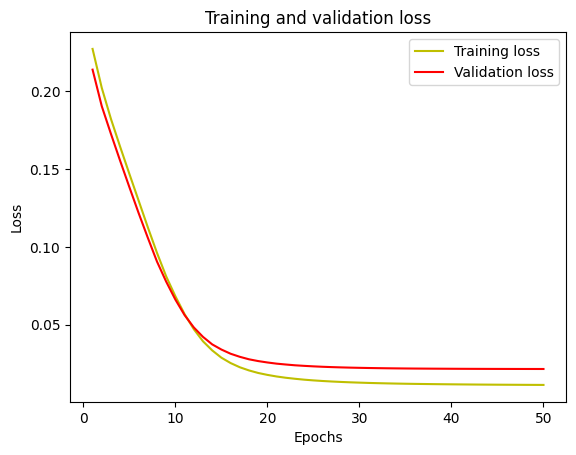

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
result = confusion_matrix(y_test, y_pred.round())

In [ ]:
print(result)

[[42  1]
 [ 1 70]]


<Axes: >

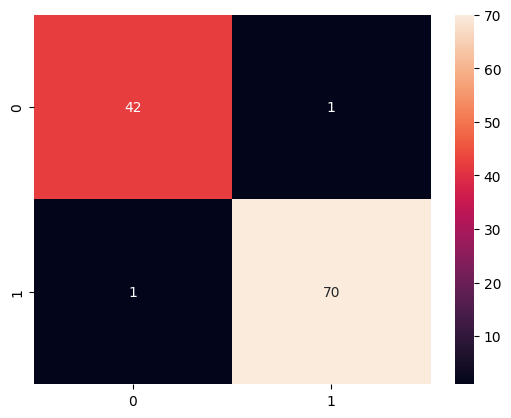

In [ ]:
sns.heatmap(result, annot=True)

In [ ]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

